In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import sys

sys.path.append("..")

import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# Load data

In [2]:
# 2 n_features sets "sinus", "circle", "multi", "moons", "heter"
# 3 n_features sets "helix", "3d"

scenario = "sinus"
n_instance = 100 # number of generated points
n_features = 2

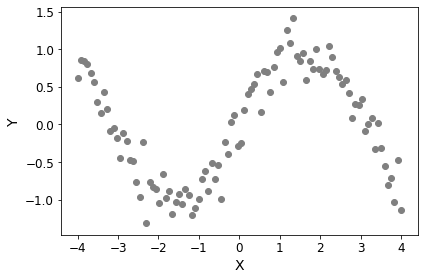

In [3]:
if scenario in ("3d", "helix") :
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.tight_layout()
    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

# WGAN

### Preprocessing

In [4]:
wgan = WGAN_Model.WGAN(n_features)

In [5]:
train_dataset, X_train_concat_flatten, scaler,  X_train_concat = wgan.preproc(X_train, y_train)
test_dataset, X_test_concat_flatten, scaler1,  X_test_concat = wgan.preproc(X_test, y_test)

every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (1, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (10, 20, 2, 1)
every time the data shape (1, 20, 2, 1)


### Training

In [6]:
hist = wgan.train(train_dataset, epochs=100)

Epoch 0/100
discriminator: 0.155603 - generator: -0.965503 - 7s
Epoch 1/100
discriminator: -0.104101 - generator: -0.663398 - 0s
Epoch 2/100
discriminator: -0.368724 - generator: -0.715343 - 0s
Epoch 3/100
discriminator: -0.225196 - generator: -0.683502 - 0s
Epoch 4/100
discriminator: -0.203436 - generator: -0.713528 - 0s
Epoch 5/100
discriminator: -0.378674 - generator: -0.621474 - 0s
Epoch 6/100
discriminator: -0.280886 - generator: -0.575921 - 0s
Epoch 7/100
discriminator: -0.232972 - generator: -0.711525 - 0s
Epoch 8/100
discriminator: -0.238786 - generator: -0.481842 - 0s
Epoch 9/100
discriminator: -0.508463 - generator: -0.542738 - 0s
Epoch 10/100
discriminator: -0.289981 - generator: -0.541323 - 0s
Epoch 11/100
discriminator: -0.324812 - generator: -0.480247 - 0s
Epoch 12/100
discriminator: -0.285609 - generator: -0.509170 - 0s
Epoch 13/100
discriminator: -0.325798 - generator: -0.533643 - 0s
Epoch 14/100
discriminator: -0.479967 - generator: -0.497072 - 0s
Epoch 15/100
discrimi

Loss: 


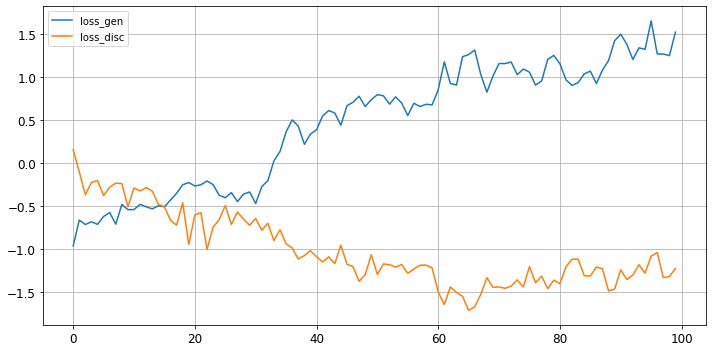

In [7]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.tight_layout()

### Prediction

In [8]:
wgan_pred = wgan.predict(X_test_concat_flatten, scaler1, X_test_concat)

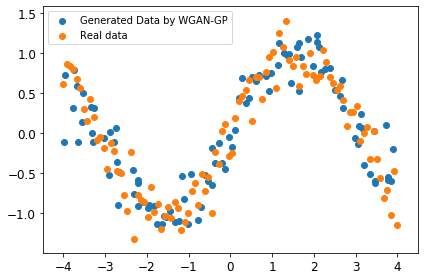

In [9]:
if scenario in ("3d", "helix"):
    ax = plt.subplot(projection='3d')

    ax.scatter(wgan_pred[:,0], wgan_pred[:,1], wgan_pred[:,2], c='b', label='Generated Data')  # 绘制数据点,颜色是红色
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
else:
    plt.scatter(wgan_pred[:,0], wgan_pred[:,1], label="Generated Data by WGAN-GP")
    plt.scatter(X_train, y_train, label="Real data")
    plt.legend(loc='best')
    plt.tight_layout()

# Gaussian Process Regression

In [10]:
ypred_GPR = GPR_Model.train(X_train, y_train, X_test, n_features)

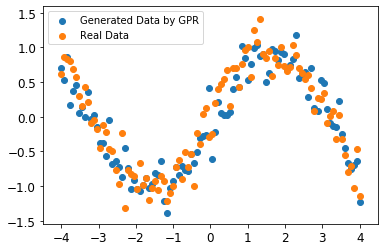

In [11]:
if scenario in ("3d", "helix"):
    ax = plt.subplot(projection='3d')

    ax.scatter(X_test[:,0], X_test[:,1], ypred_GPR, c='b', label='Generated Data')  # 绘制数据点,颜色是红色
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z') 
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()

else:
    plt.scatter(X_test, ypred_GPR, label='Generated Data by GPR')
    plt.scatter(X_train, y_train, label='Real Data')
    plt.legend(loc='best')

# Comparison

### Prediction Plots

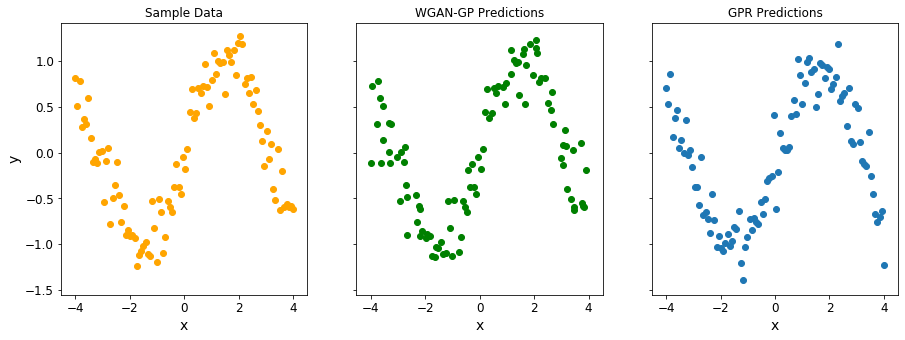

In [12]:
# generates the plots
if scenario in ("3d", "helix"):
    fig = plt.figure(figsize=(13, 4))

    #---- First subplot
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, color='orange')
    ax.set_title("Sample Data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(0,22)

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.scatter(wgan_pred[:,0], wgan_pred[:,1], wgan_pred[:,2], color='green', label='Generated Data')
    ax.set_title("WGAN-GP Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(0,22)

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], ypred_GPR, c='b', label='Generated Data')
    ax.set_title("GPR Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(0,22)
    
    plt.tight_layout(pad=-1, w_pad=0.8, h_pad=0)
    

else:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
    axes[0].scatter(X_test, y_test, label='Real Data', color='orange')
    axes[0].set_title("Sample Data")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")

    axes[1].scatter(wgan_pred[:,0], wgan_pred[:,1], label="Generated Data by WGAN-GP", color='green')
    axes[1].set_title("WGAN-GP Predictions")
    axes[1].set_xlabel("x")

    axes[2].scatter(X_test, ypred_GPR, label='Generated Data by GPR')
    axes[2].set_title("GPR Predictions")
    axes[2].set_xlabel("x")


### Probability Density Plots

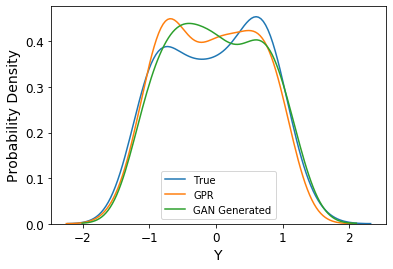

In [13]:
# whole distribution
sns.distplot(y_train, hist=False, label='True')
sns.distplot(ypred_GPR, hist=False, label='GPR')
sns.distplot(wgan_pred[:,1], hist=False, label='GAN Generated')
plt.xlabel("Y")
plt.ylabel("Probability Density")
plt.legend(loc='best');

### Please change the variables for desired probability density plots.

In [14]:
# user inputs
values = [-0.75,0,0.75] # input values
bounds = 0.5 # determine interval size

# for graph axis
x_min = -1.5
x_max = 1.5

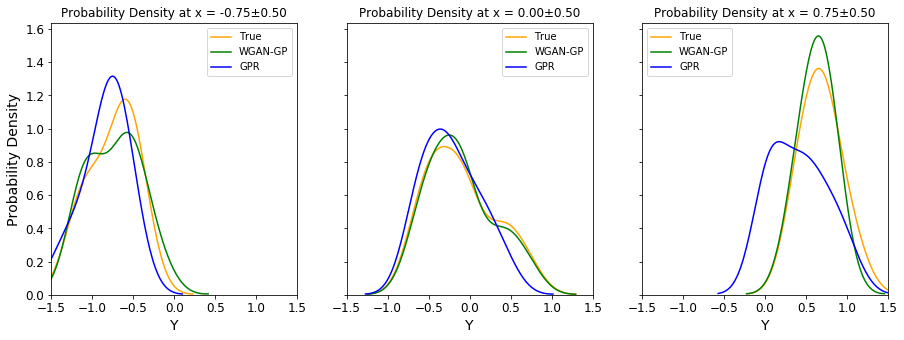

In [15]:
# generating the plots
if scenario in ("3d", "helix"):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[0], bounds)
    wgan_y = prob_dist.y2_values(wgan_pred[:,0], wgan_pred[:,1], wgan_pred[:,2], values[0], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[0], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x & y = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Z")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[1], bounds)
    wgan_y = prob_dist.y2_values(wgan_pred[:,0], wgan_pred[:,1], wgan_pred[:,2], values[1], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[1], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x & y = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Z")
    ax2.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[2], bounds)
    wgan_y = prob_dist.y2_values(wgan_pred[:,0], wgan_pred[:,1], wgan_pred[:,2], values[2], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[2], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x & y = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Z")
    ax3.set_xlim(x_min, x_max)

else:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    wgan_y = prob_dist.y_values(wgan_pred[:,0], wgan_pred[:,1], values[0], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[0], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[0], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Y")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(wgan_pred[:,0], wgan_pred[:,1], values[1], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[1], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[1], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Y")
    ax2.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(wgan_pred[:,0], wgan_pred[:,1], values[2], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[2], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[2], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Y")
    ax3.set_xlim(x_min, x_max)